In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Movies=pd.read_csv("movies.csv", encoding= 'unicode_escape')

In [3]:
Movies

,MovieID,Title,Genres,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,NaN,NaN,NaN,NaN
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN,NaN,NaN
3880,3950,Tigerland (2000),Drama,NaN,NaN,NaN,NaN
3881,3951,Two Family House (2000),Drama,NaN,NaN,NaN,NaN


In [4]:
Users = pd.read_csv('users.csv')

In [5]:
Users


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [6]:
Ratings = pd.read_csv('ratings.csv')

In [8]:
Ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [9]:
MovieRatings = Movies.merge(Ratings,on='MovieID',how='inner')
master = MovieRatings.merge(Users,on="UserID",how='inner')
master.head()

,MovieID,Title,Genres,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,NaN,NaN,NaN,NaN,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,NaN,NaN,NaN,NaN,1,5,978301777,F,1,10,48067
3,260,Star Wars,NaN,Episode IV - A New Hope (1977),NaN,NaN,NaN,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,NaN,NaN,NaN,NaN,1,5,978824195,F,1,10,48067


In [10]:

Master= master.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5', 'Unnamed: 6'], axis='columns')

In [11]:
Master

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars,NaN,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [12]:
# to check whether merging does not changes any dataset
MovieRatings.shape

(1000209, 10)

In [13]:
Master.to_csv("Master.csv")

In [14]:
# Users with Different Age Groups
Master['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

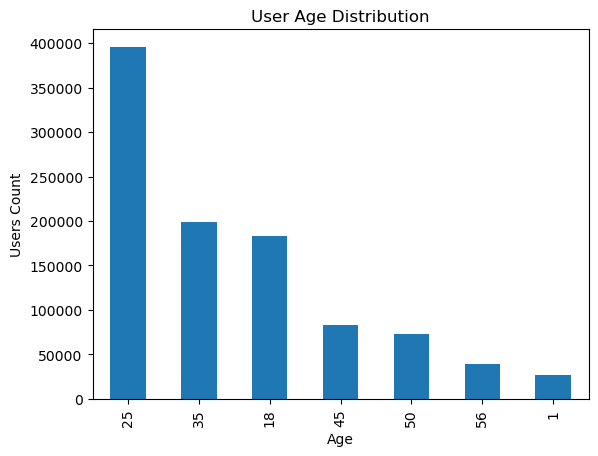

In [15]:
# Plot for users with different age groups
Master['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

In [16]:
# Toy Story
toystoryRating = Master[Master['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [17]:
toystoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

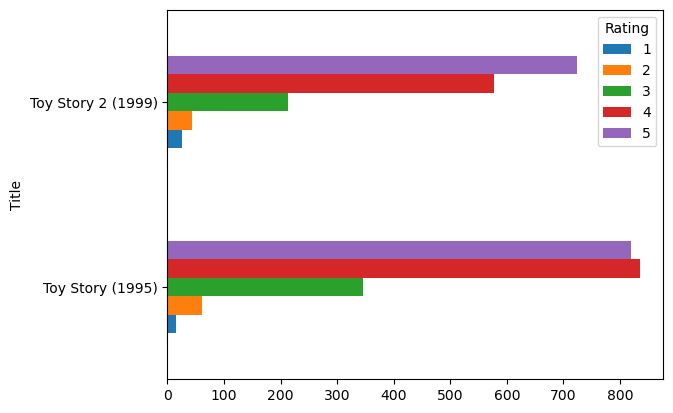

In [18]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

In [19]:
dfTop25 = Master.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
Star Wars                            11114
Star Trek                             5347
American Beauty (1999)                3428
Mission                               2840
Jurassic Park (1993)                  2672
Saving Private Ryan (1998)            2653
Terminator 2                          2649
Austin Powers                         2639
Matrix, The (1999)                    2590
Back to the Future (1985)             2583
Silence of the Lambs, The (1991)      2578
Men in Black (1997)                   2538
Raiders of the Lost Ark (1981)        2514
Fargo (1996)                          2513
Godfather                             2466
Sixth Sense, The (1999)               2459
Braveheart (1995)                     2443
Shakespeare in Love (1998)            2369
Princess Bride, The (1987)            2318
Schindler's List (1993)               2304
L.A. Confidential (1997)              2288
Groundhog Day (1993)                  2278
E.T. the Extra-Terrestrial (1982)     2269
Being

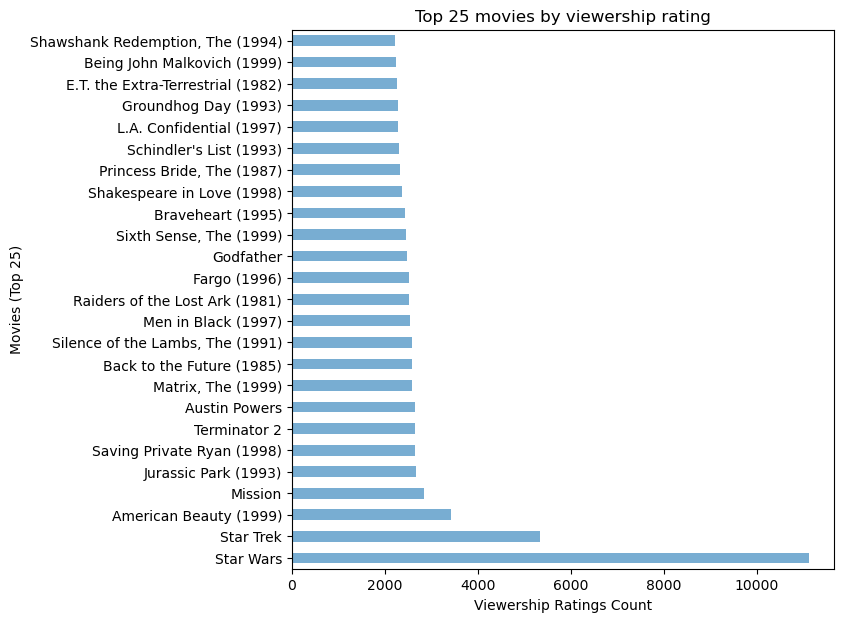

In [20]:
dfTop25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

In [21]:
userId = 2696
userRatingById = Master[Master["UserID"] == userId]
userRatingById.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


In [22]:
dfGenres = Master['Genres'].str.split("|")
dfGenres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3                                                NaN
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [23]:
listGenres = set()
for genre in dfGenres:
    if isinstance(genre, (list, tuple, set)):
        listGenres = listGenres.union(set(genre))
    else:
        print(f"Warning: non-iterable value encountered: {genre}")
# All Unique genres
listGenres

{' Miami Beach (1988)',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [24]:
ratingsOneHot = Master['Genres'].str.get_dummies("|")
ratingsOneHot.head()

,Miami Beach (1988),Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
Master = pd.concat([Master,ratingsOneHot],axis=1)
Master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', ' Miami Beach (1988)', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
Master.to_csv("Final_Master.csv")


In [27]:
Master[["title","Year"]] = Master.Title.str.extract("(.)\s\((.\d+)",expand=True)


In [28]:
Master = Master.drop(columns=["Title"])
Master.head()

,MovieID,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Miami Beach (1988),...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,Year
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,y,1995
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,0,1,0,1,0,0,0,0,s,1995
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,3,1995
3,260,NaN,1,4,978300760,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,1,0,t,1993


In [29]:
Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   MovieID              1000209 non-null  int64 
 1   Genres               936531 non-null   object
 2   UserID               1000209 non-null  int64 
 3   Rating               1000209 non-null  int64 
 4   Timestamp            1000209 non-null  int64 
 5   Gender               1000209 non-null  object
 6   Age                  1000209 non-null  int64 
 7   Occupation           1000209 non-null  int64 
 8   Zip-code             1000209 non-null  object
 9    Miami Beach (1988)  1000209 non-null  int64 
 10  Action               1000209 non-null  int64 
 11  Adventure            1000209 non-null  int64 
 12  Animation            1000209 non-null  int64 
 13  Children's           1000209 non-null  int64 
 14  Comedy               1000209 non-null  int64 
 15  Crime          

In [31]:
Master = Master.fillna(0) 
Master['Year'] = Master.Year.astype(int)
Master['Movie_Age'] = 2022 - Master.Year
Master.head()

,MovieID,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Miami Beach (1988),...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,y,1995,27
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,1,0,1,0,0,0,0,s,1995,27
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,3,1995,27
3,260,0,1,4,978300760,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,2022
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,1,0,t,1993,29


In [32]:
Master['Gender'] = Master.Gender.str.replace('F','1')
Master['Gender'] = Master.Gender.str.replace('M','0')
Master['Gender'] = Master.Gender.astype(int)
Master.head()

,MovieID,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Miami Beach (1988),...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,0,...,0,0,0,0,0,0,0,y,1995,27
1,48,Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,0,...,1,0,1,0,0,0,0,s,1995,27
2,150,Drama,1,5,978301777,1,1,10,48067,0,...,0,0,0,0,0,0,0,3,1995,27
3,260,0,1,4,978300760,1,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,2022
4,527,Drama|War,1,5,978824195,1,1,10,48067,0,...,0,0,0,0,0,1,0,t,1993,29


In [33]:
dfGenderAffecting = Master.groupby('Gender').size().sort_values(ascending=False)[:25]

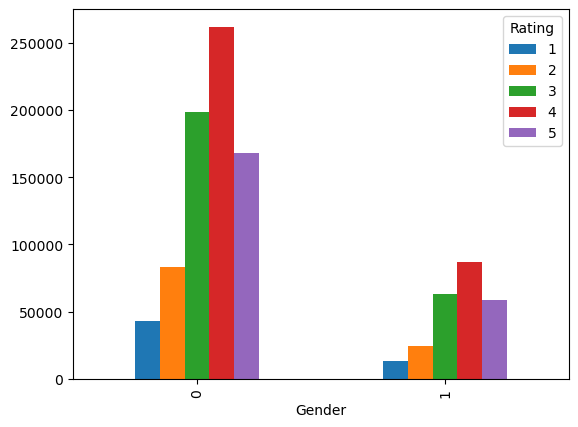

In [34]:
Master.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

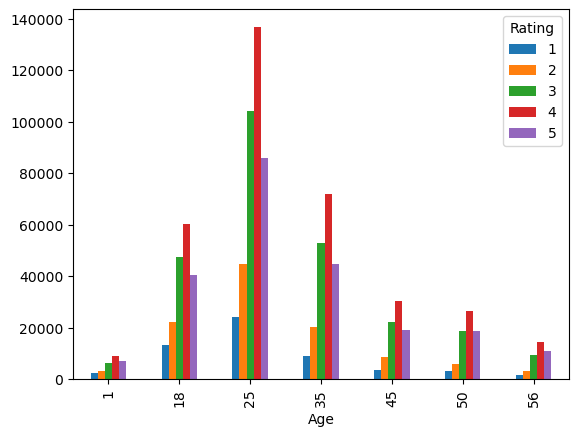

In [35]:
Master.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

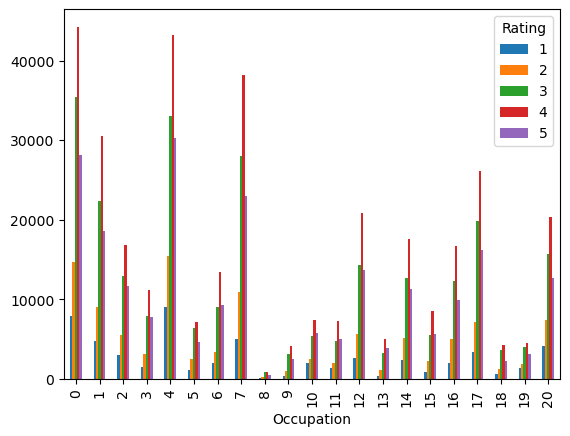

In [36]:
Master.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

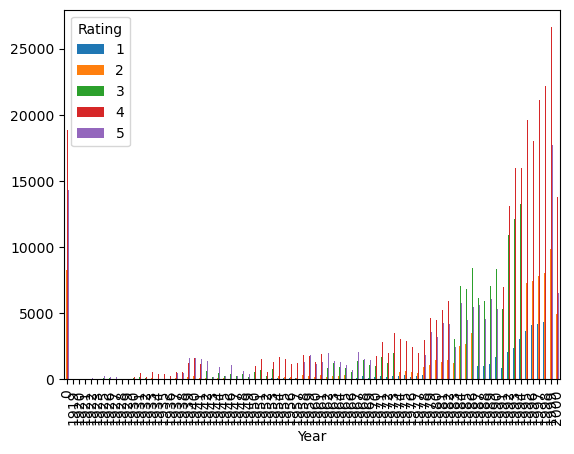

In [37]:
Master.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

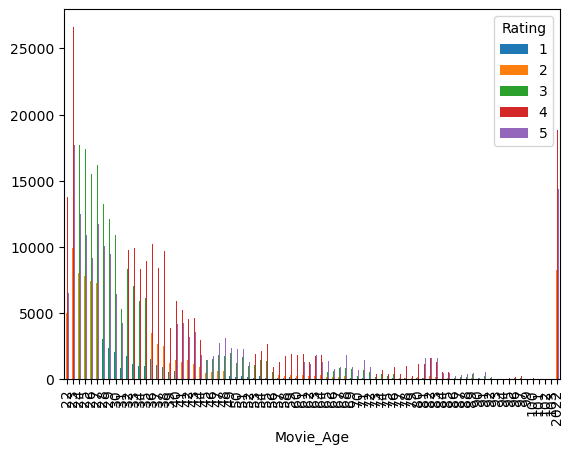

In [38]:
Master.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [39]:
#First 1000 extracted records
first_1000 = Master[:1000]
first_1000

,MovieID,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Miami Beach (1988),...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,0,...,0,0,0,0,0,0,0,y,1995,27
1,48,Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,0,...,1,0,1,0,0,0,0,s,1995,27
2,150,Drama,1,5,978301777,1,1,10,48067,0,...,0,0,0,0,0,0,0,3,1995,27
3,260,0,1,4,978300760,1,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,2022
4,527,Drama|War,1,5,978824195,1,1,10,48067,0,...,0,0,0,0,0,1,0,t,1993,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2384,0,18,2,978155233,1,18,3,95825,0,...,0,0,0,0,0,0,0,0,0,2022
996,2391,Crime|Thriller,18,1,978155685,1,18,3,95825,0,...,0,0,0,0,1,0,0,A,1998,24
997,2394,Animation|Musical,18,4,978154907,1,18,3,95825,0,...,1,0,0,0,0,0,0,e,1998,24
998,2402,0,18,2,978153894,1,18,3,95825,0,...,0,0,0,0,0,0,0,0,0,2022


In [40]:
#Use the following features:movie id,age,occupation
features = first_1000[['MovieID','Age','Occupation']].values
#Use rating as label
labels = first_1000[['Rating']].values
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]], dtype=int64)

In [41]:
#Create train and test data set
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)
train.shape

(670, 3)

In [42]:
test.shape

(330, 3)

In [43]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

36.72

In [44]:
from sklearn.svm import SVC, LinearSVC
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc


38.81

In [45]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc


31.64

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

59.4

In [47]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

39.55

In [48]:
from sklearn.linear_model import Perceptron
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

34.33

In [49]:
from sklearn.linear_model import SGDClassifier
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

37.16

In [50]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [51]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

100.0

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

100.0

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,59.40
4,Naive Bayes,39.55
0,Support Vector Machines,38.81
6,Stochastic Gradient Decent,37.16
2,Logistic Regression,36.72
5,Perceptron,34.33
7,Linear SVC,31.64
